# Hintergrundbild aus dem Rapid Scan

Fabians Skript erzeugt bisher nur Bilder für den Hauptscan. Es wäre auch schön Bilder des Rapidscans zu haben.


In [ ]:
import sys, os, glob

# standard libraries
import numpy as np
import datetime
import datetime as dt
import matplotlib
matplotlib.use('Agg')

import pylab as pl
from PIL import Image,ImageDraw, ImageFont

# tropy libraries
#import tropy.io_tools.HRIT as hio
#from tropy.l15_msevi.msevi_rgb import MSeviRGB
#import tropy.l15_msevi.msevi_config
#from tropy.io_tools.find_latest_slot import find_latest_slot
sys.path.append("/vols/talos/lenk/lib/tropy")
import io_tools.HRIT as hio
from l15_msevi.msevi_rgb import MSeviRGB
import l15_msevi.msevi_config
from io_tools.find_latest_slot import find_latest_slot

Um die RSS-Bilder zu erzeugen und zu speichern, müssen wir die Funktionen etwas anpassen.

In [36]:
def df_pic(time_slot, pic_name, rgb_type = 'pytroll_nc'):


    # get HRIT data
    msg_rgb = MSeviRGB(time = time_slot, 
                       rgb_type = rgb_type, 
                       region = 'full', 
                       scan_type = 'rss',
                       tstamp = False)


    # create and save image
    pil = msg_rgb.images[rgb_type]
    rgb = np.array(pil)
    rgb = rgb[92:1085,1056:2656]
    pil = Image.fromarray(rgb)


    # get dimension of the image
    #pil = pil.resize((1200, 1200), Image.ANTIALIAS)
    nx, ny = pil.size

    # stamp with LOGO
    stamp_image(pil)

    # create an ImageDraw object from image
    dpil=ImageDraw.Draw(pil)

    # load font
    fontfile='/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf'
    sans=ImageFont.truetype(fontfile,16)


    # include time stamp 
    offset = 50 #40
    dpil.text((offset,ny-offset),time_slot.strftime('%Y-%m-%d  %H:%M UTC'), font=sans, fill='white')



    # save picture
    print 'save image to ', pic_name
    pil.save(pic_name)

    return

In [37]:
def stamp_image(img):

    # get TROPOS stamp
    pic_dir = os.environ['LHOME'] + '/pics'
    stamp = Image.open('%s/TROPOS-stamp.png' % pic_dir)

    # get size of image
    nx_img, ny_img = img.size

    # get size of stamp
    nx_stamp, ny_stamp = stamp.size 

    # set offset
    dx, dy = (30, 35)

    # calculate stamp position
    px = nx_img - nx_stamp - dx
    py = ny_img - ny_stamp - dy

    # combine stamp and image
    img.paste(stamp,(px, py))

    return 

In [38]:
def save_rss_image(date,
                   rgb_type = 'pytroll_nc', mode = 'latest'):

    # set subdir -----------------------------------------------------
    if rgb_type == 'pytroll_nc':
        subdir = 'nc-rss-cutout'
    elif rgb_type == 'col_108':
        subdir = 'bt108-rss-cutout'
    else:
        subdir = '%s-rss' % rgb_type
    # ================================================================
        

 
    # image creation if necessary ------------------------------------
    # set picture directory

    date_string = date.strftime('%Y/%m/%d/')
    pic_base = os.environ['LHOME'] + '/pics'

    pic_dir = '%s/%s/%s' %(pic_base, subdir, date_string)
    
    if not os.access(pic_dir, os.F_OK):
        os.makedirs(pic_dir)

    # set picture filename
    time_string = date.strftime('%Y%m%d_%H%M')
    fname = '%s/%s_%s.png' % (pic_dir, subdir, time_string)
    
    if os.access(fname, os.F_OK):
        print fname,' exists: nothing to do!'
    else:
        df_pic(date, fname, rgb_type = rgb_type)
 
        if mode == 'latest' and  rgb_type == 'pytroll_nc':
            # set name of most actual image
            msg_today = pic_base + '/msg_today.png'
    
            cp_com = 'cp %s %s' % (fname, msg_today)
            os.system(cp_com)
    # ================================================================

In [2]:
c = l15_msevi.msevi_config._arch_config.copy()
c['date_string']=''
c['scan_type']='rss'
arch_dir = c['arch_dir'] + c['hrit_subpath'].format(**c)

date = find_latest_slot(arch_dir = arch_dir, time_string = c['time_string'], scan_type = 'pzs')

latest file: /vols/altair/datasets/eumcst//msevi_pzs/l15_hrit/2019/05/22/msg4-sevi-20190522t0630z-l15hrit-pzs.c2.tar


In [3]:
msg_rgb = MSeviRGB(time = date, 
                   rgb_type = 'pytroll_nc', 
                   region = 'full', 
                   scan_type = 'rss',
                   tstamp = False)

... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-VIS008___-000006___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-VIS008___-000007___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-VIS008___-000008___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-VIS006___-000006___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-VIS006___-000007___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-VIS006___-000008___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-IR_016___-000006___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-IR_016___-000007___-201905220630-__
... reading  /tmp/hrit7877693250/H-000-MSG3__-MSG3_RSS____-IR_016___-000008___-201905220630-__

Combine segments

Do calibration


In [4]:
pil = msg_rgb.images['pytroll_nc']

In [12]:
pil.save("/vols/talos/home/stephan/pics/nc_test.png")

In [14]:
rgb = np.array(msg_rgb.images['pytroll_nc'])

In [16]:
rgb.shape

(1392, 3712, 3)

In [19]:
import matplotlib.pyplot as plt
plt.switch_backend("Qt5Agg")
%matplotlib inline

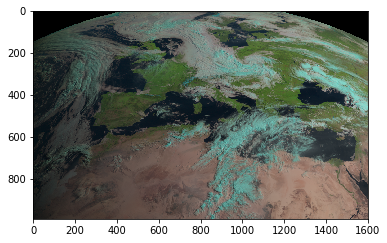

In [31]:
plt.imshow(rgb[92:1085,1056:2656])
plt.savefig("/vols/talos/home/stephan/pics/nc_eu_test.png")

In [34]:
rgb = rgb[92:1085,1056:2656]

In [35]:
pic = Image.fromarray(rgb)
pic.save("/vols/talos/home/stephan/pics/nc_eu_test.png")

In [39]:
save_rss_image(date, rgb_type = 'pytroll_nc', mode = 'latest')
save_rss_image(date, rgb_type = 'col_108', mode = 'latest')

... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-VIS008___-000006___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-VIS008___-000007___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-VIS008___-000008___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-VIS006___-000006___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-VIS006___-000007___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-VIS006___-000008___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-IR_016___-000006___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-IR_016___-000007___-201905220630-__
... reading  /tmp/hrit7999329096/H-000-MSG3__-MSG3_RSS____-IR_016___-000008___-201905220630-__

Combine segments

Do calibration


AttributeError: 'module' object has no attribute 'from_array'